In [1]:
##importing and cleaning data
import unicodecsv
with open('abalone.csv','rb') as f:
    reader=unicodecsv.reader(f)
    data_abalone=list(reader)
print data_abalone[0]

[u'M', u'0.455', u'0.365', u'0.095', u'0.514', u'0.2245', u'0.101', u'0.15', u'15']


In [2]:
map_genders={'M':0,'F':1,'I':-1}
for data in data_abalone:
    data[0]=map_genders[data[0]]
    for i in range(1,len(data)-1,1):
        data[i]=float(data[i])
    data[-1]=int(data[-1])
print data_abalone[1]

[0, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07, 7]


In [3]:
print data_abalone[4]

[-1, 0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.055, 7]


In [4]:
##creating the arrays
import numpy as np
data_abalone=np.array(data_abalone)
X=data_abalone[:,:-1]
y=data_abalone[:,-1]

In [5]:
print X[0]
y=np.array(y,dtype=int)
print y[0]

[ 0.      0.455   0.365   0.095   0.514   0.2245  0.101   0.15  ]
15


In [6]:
##splitting the data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1)
X_train_pca=X_train
X_test_pca=X_test
X_pca=X

In [7]:
##performing Pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_pca=pca.transform(X)
print pca.explained_variance_ratio_[0]

0.773914738661


[15  7  9 10  7  8 20 16  9 19 14 10 11 10 10 12  7 10  7  9 11 10 12  9 10
 11 11 12 15 11 10 15 18 19 13  8 16  8 11  9  9 14  5  5  4  7  9  7  6  9]


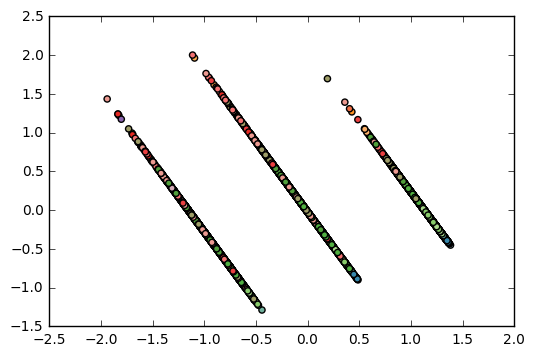

In [34]:
print y[0:50]
import numpy as np
from matplotlib import pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

In [8]:
##building the classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from time import time
clf=SVC(kernel='rbf',C=10.0,gamma=1)
#clf=LinearRegression()
t0=time();
clf.fit(X_train_pca,y_train)
print "training time",round(time()-t0,3),"s"
t0=time()
pred=clf.predict(X_test_pca)
print "Predicting time",round(time()-t0,3),"s"

training time 1.79 s
Predicting time 0.113 s


In [9]:
print clf.score(X_test_pca,y_test)

0.244019138756


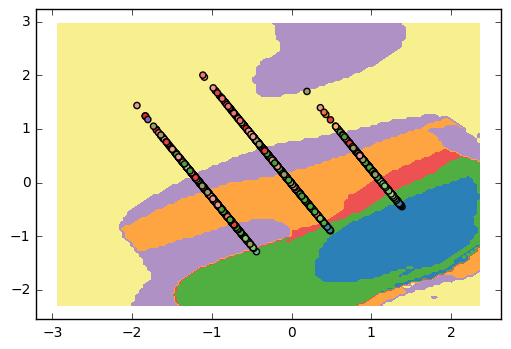

In [38]:
##color plot
import numpy as np
h=0.05
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()